## **H3K36 peptide - Analysis@Pixar**

## **Import modules**

In [1]:
import os
import sys

data_path=os.path.abspath('/media/dataHog/hca/SETD2') #Where your group data is
base_path=os.path.abspath('/media/dataHog/hca/SimFound_v2/source/') #Where your source code is (SFv2)

sys.path.append(base_path)
sys.path.append(data_path)

import importlib

import warnings
warnings.filterwarnings('ignore')
import Protocols as P

import main
import tools
import Featurize
import Trajectory
import MSM


from simtk.unit import *

## **Define Project**

In [2]:
workdir=data_path
results=workdir+'/results'
inputs=workdir+'inputs/structures/'



#protein=['WT', 'R167Q', 'I602G']
protein=['h3K36']

parameters=['310K']
timestep=20*picoseconds

project=main.Project(title='h3K36', 
                     hierarchy=('protein', 'parameter'), 
                     workdir=workdir,
                     parameter=parameters, 
                     replicas=10, 
                     protein=protein,  
                     topology='h3K36_ext.pdb',
                     timestep=timestep,
                    initial_replica=1)


project_systems=project.setSystems()

Converted parameter "temperature" (in K) into scalar: 310.0 K
System h3K36-310K-1 with parameter 310.0 K defined
System h3K36-310K-2 with parameter 310.0 K defined
System h3K36-310K-3 with parameter 310.0 K defined
System h3K36-310K-4 with parameter 310.0 K defined
System h3K36-310K-5 with parameter 310.0 K defined
System h3K36-310K-6 with parameter 310.0 K defined
System h3K36-310K-7 with parameter 310.0 K defined
System h3K36-310K-8 with parameter 310.0 K defined
System h3K36-310K-9 with parameter 310.0 K defined
System h3K36-310K-10 with parameter 310.0 K defined


## **Markov State Models**


In [5]:
importlib.reload(MSM)
importlib.reload(Trajectory)

protein_regions = {'Backbone' : 'backbone'} #cyan



features_to_extract=['torsions', 'positions']

kinetic_models={}
kinetics=MSM.MSM(project,
                 protein_regions,
                 stride=1, 
                 timestep=timestep, 
                 warnings=True)

Results will be stored under:  /media/dataHog/hca/SETD2/results/h3K36-310K
PyEMMA calculations will be stored under:  /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage


## Evaluate *features* and *dimensions* with VAMP2 scores

Backbone
Feature:  torsions
Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
 Calculating VAMP2 scores @lag 20 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 40 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 200 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 1000 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 2000 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 4000 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 10000 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 20000 ps (0.95 kinetic var.): cycle 10/10
Feature:  positions
Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
 Calculating VAMP2 scores @lag 20 ps (0.95 kinetic var.): cycle 10/10
 Calculating VAMP2 scores @lag 40 ps (

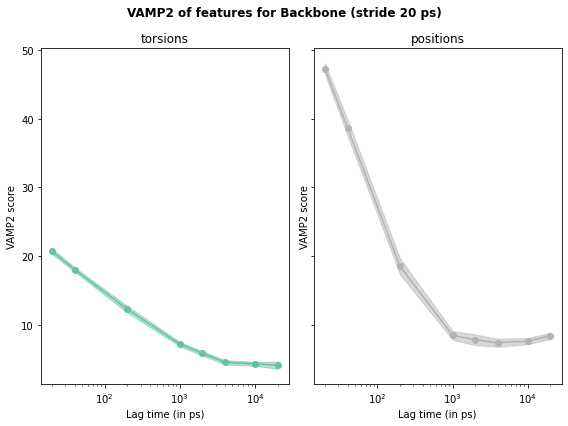

Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Lag: 20 ps

 Calculating VAMP2 scores @lag 20 ps (5 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (11 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (16 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (22 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (28 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (33 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (39 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (44 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (50 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 20 ps (56 dimensions): cycle 10/10
	Lag: 40 ps

 Calculating VAMP2 scores @lag 40 ps (5 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 40 ps (11 dimensions): cycle 10/10
 Calculating VAMP2 scores @lag 40 ps (16 dimension

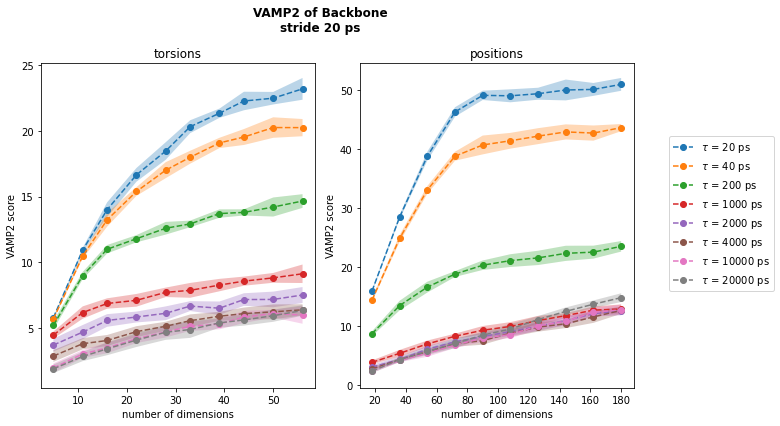

In [6]:
vamp_lags=[1, 2, 10, 50, 100, 200, 500, 1000]
kinetic_models['VAMP']=kinetics.calculate(method='VAMP', 
                                          evaluate=['features', 'dimensions'], 
                                          features=features_to_extract, 
                                          TICA_lags=vamp_lags, 
                                          dim=0.95, 
                                          def_traj=['production_NPT-1.dcd'])

## TICA

Backbone
Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Calculating TICA of torsions with lag 40 ps
	Reducing to 10 dimensions.


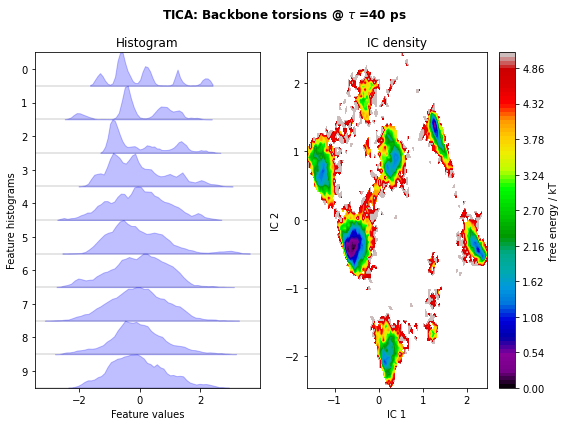

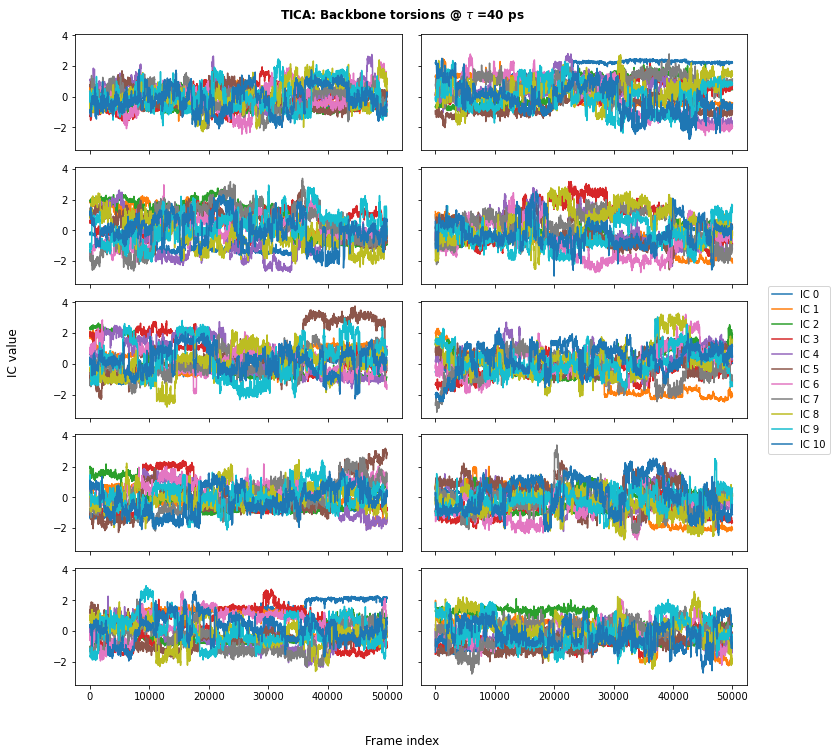

Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Calculating TICA of torsions with lag 200 ps
	Reducing to 10 dimensions.


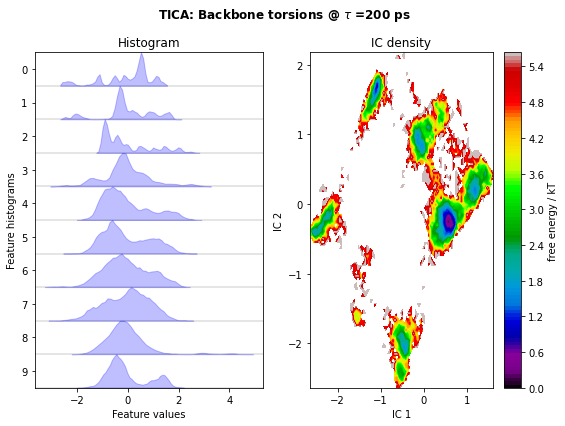

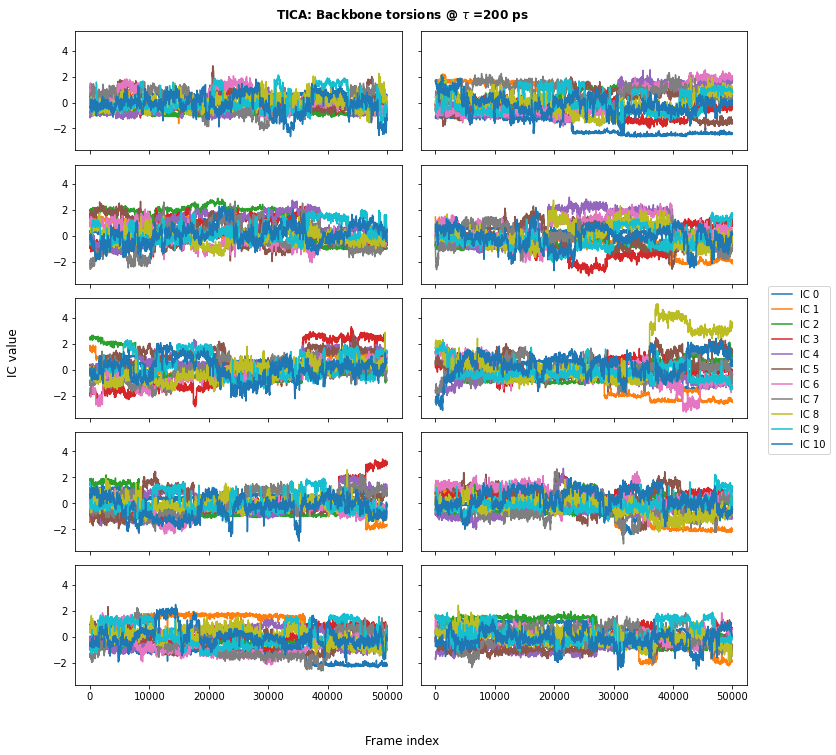

Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Calculating TICA of torsions with lag 400 ps
	Reducing to 10 dimensions.


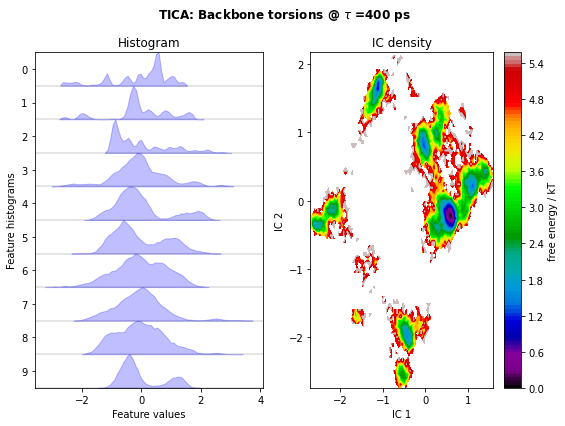

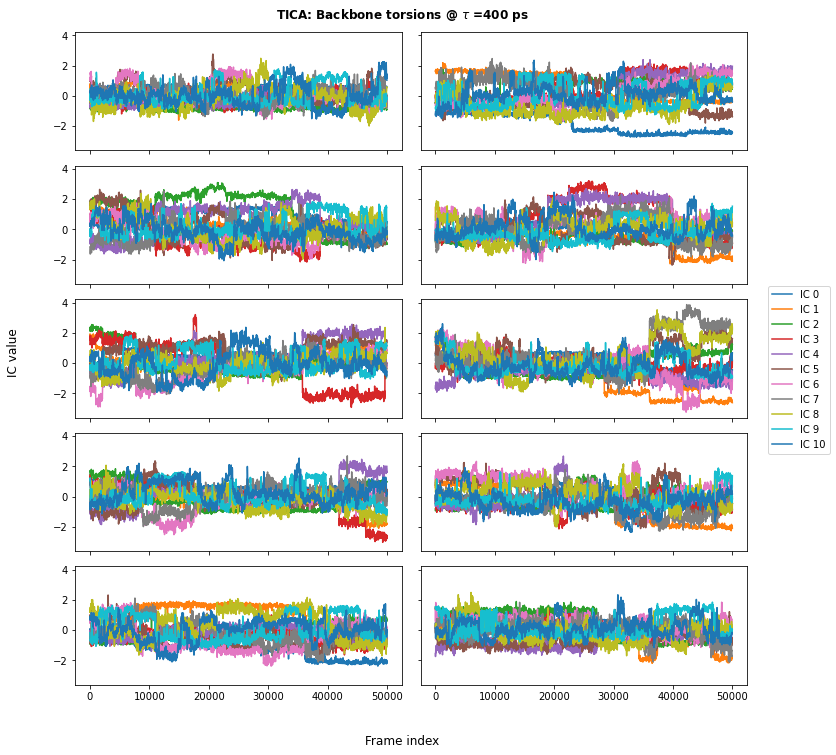

Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Calculating TICA of torsions with lag 1000 ps
	Reducing to 10 dimensions.


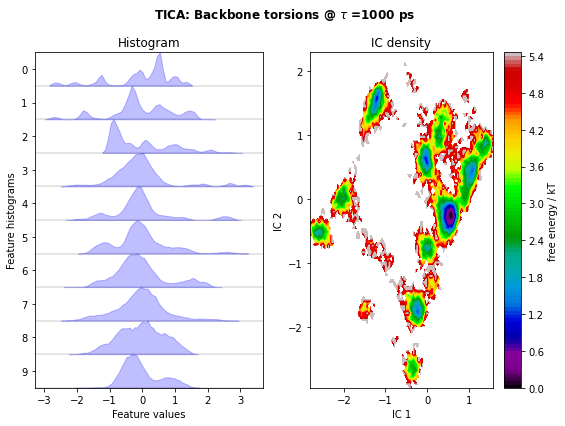

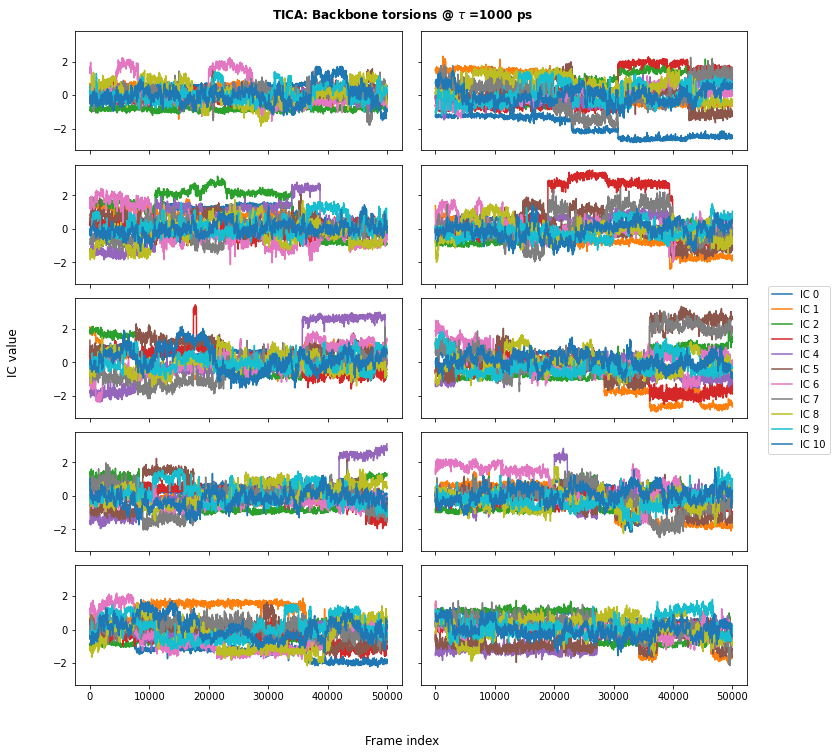

Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Calculating TICA of torsions with lag 2000 ps
	Reducing to 10 dimensions.


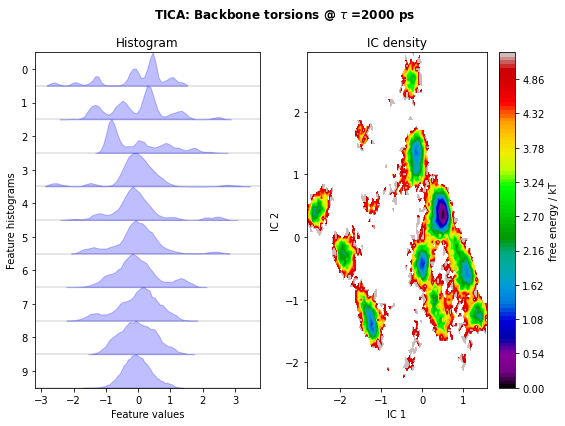

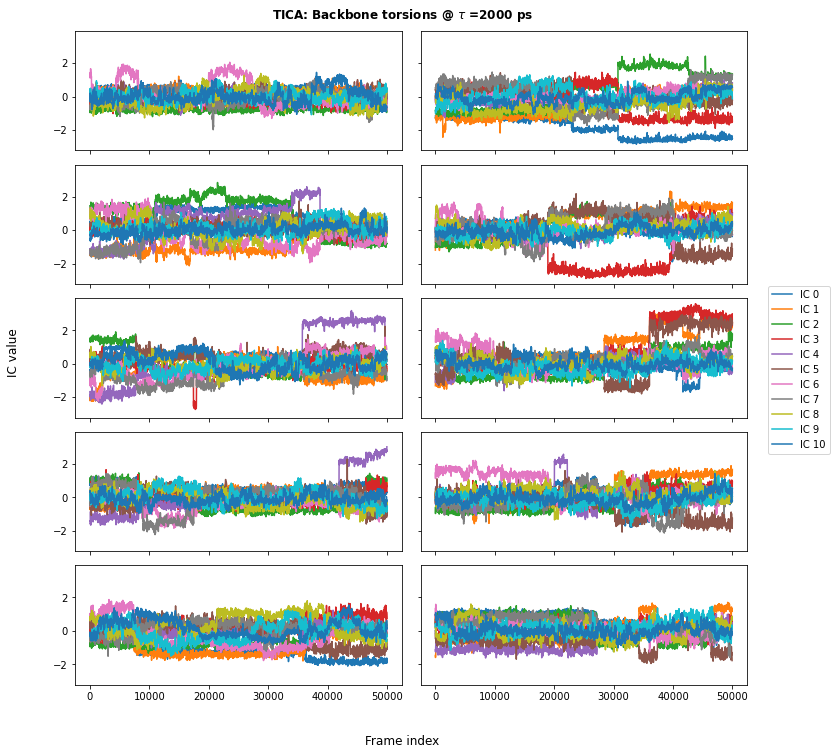

Loading featurized torsions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_torsions_stride1_dim56.npy
	Calculating TICA of torsions with lag 4000 ps
	Reducing to 10 dimensions.


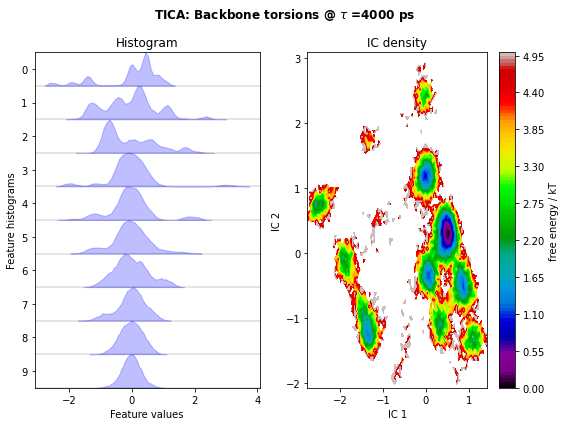

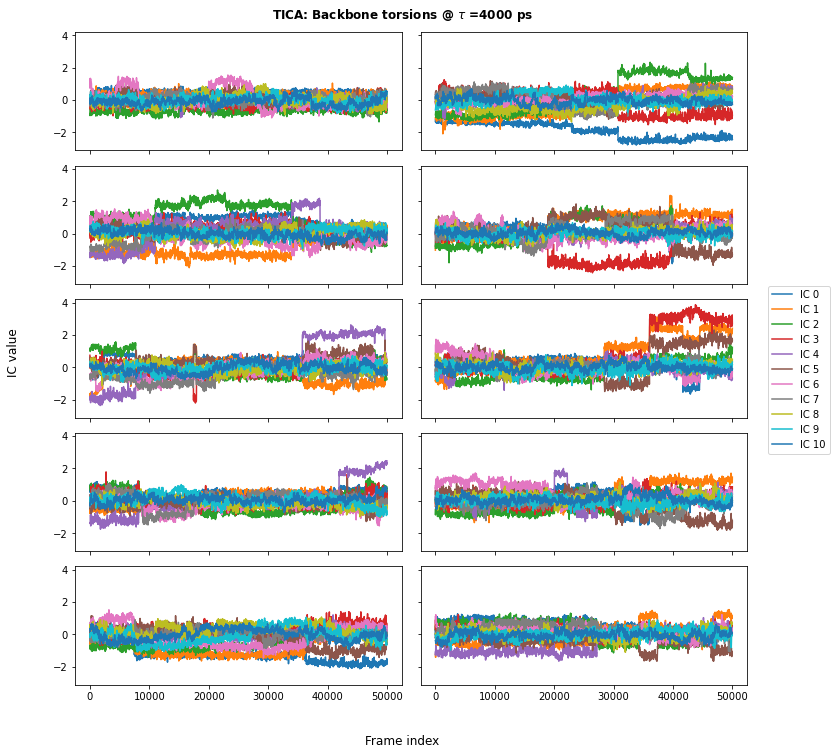

Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
	Calculating TICA of positions with lag 40 ps
	Reducing to 10 dimensions.


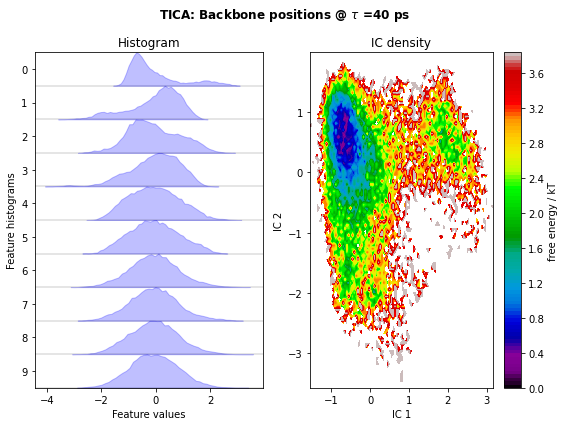

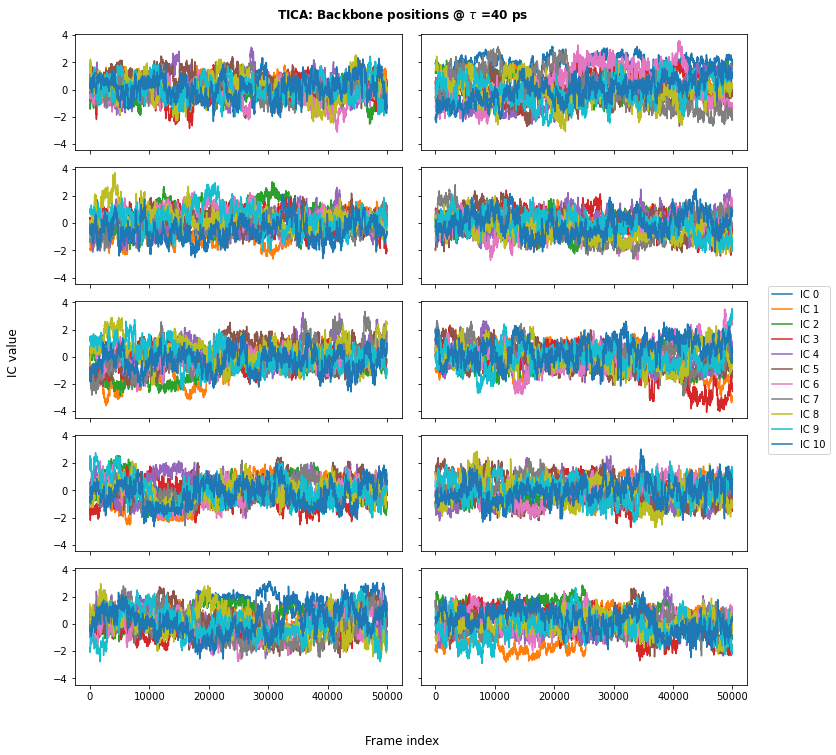

Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
	Calculating TICA of positions with lag 200 ps
	Reducing to 10 dimensions.


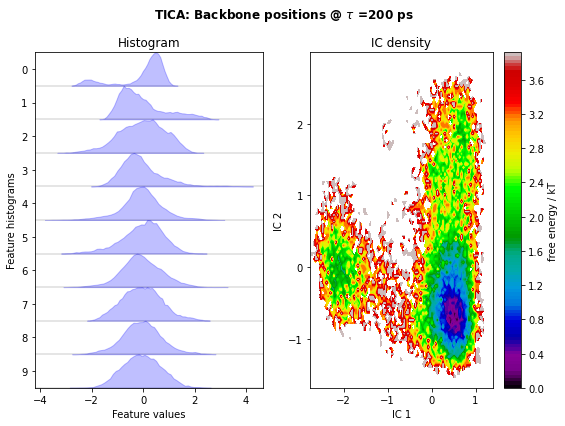

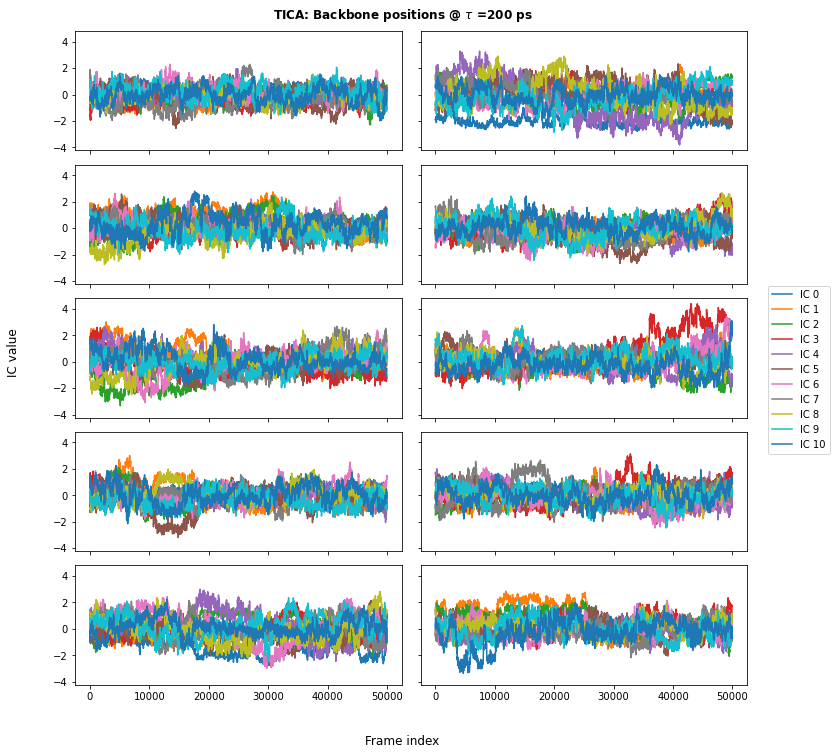

Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
	Calculating TICA of positions with lag 400 ps
	Reducing to 10 dimensions.


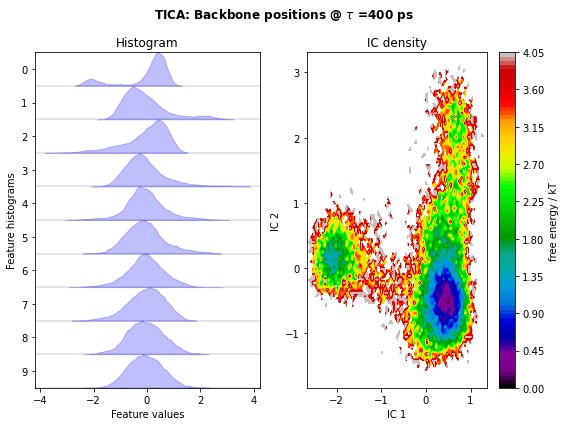

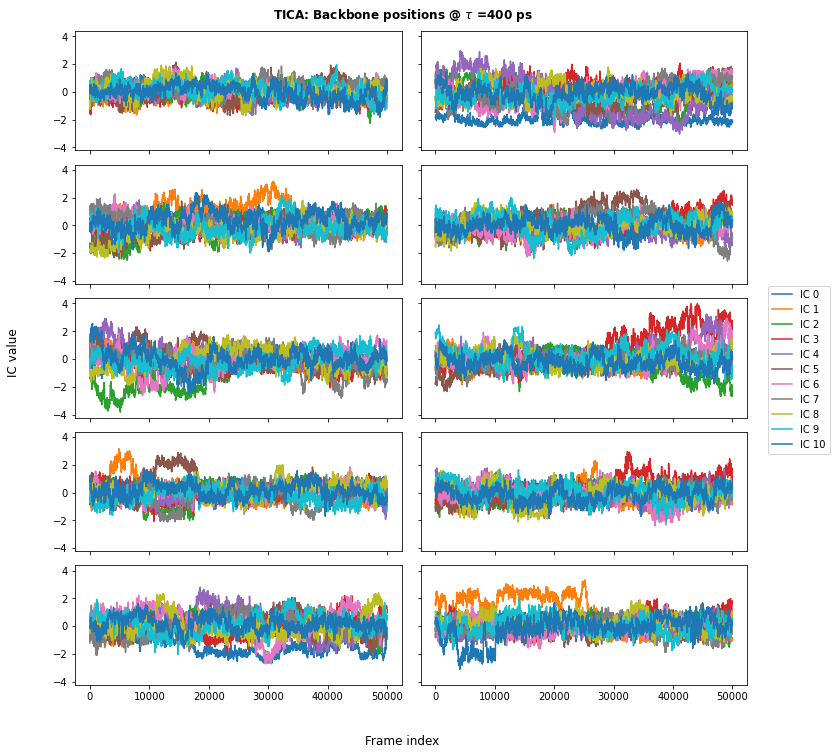

Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
	Calculating TICA of positions with lag 1000 ps
	Reducing to 10 dimensions.


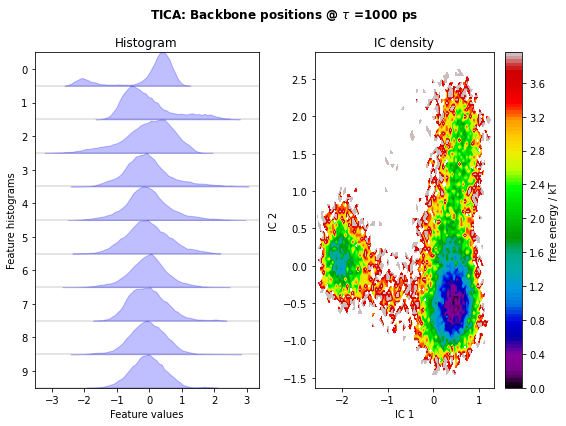

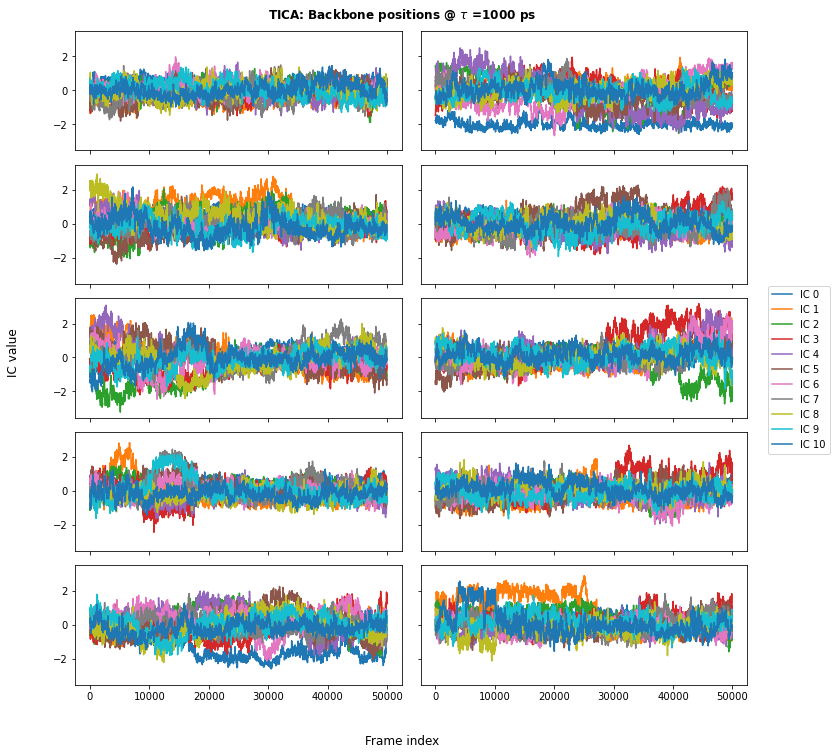

Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
	Calculating TICA of positions with lag 2000 ps
	Reducing to 10 dimensions.


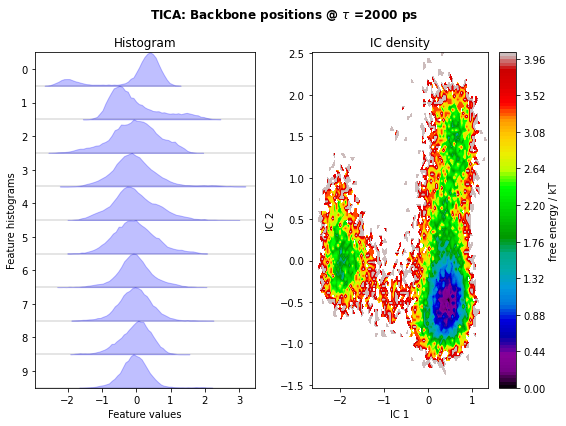

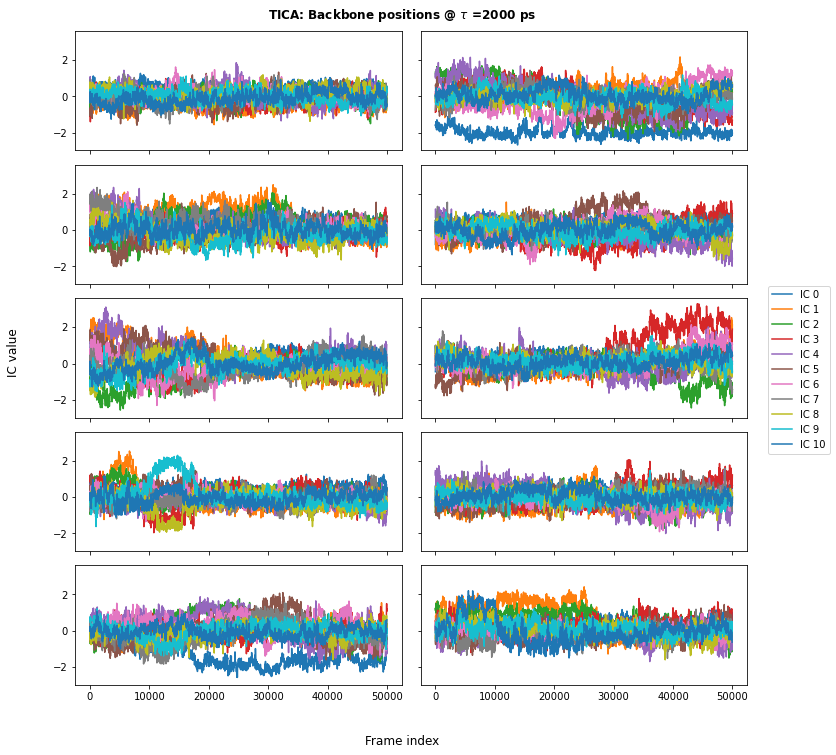

Loading featurized positions file: /media/dataHog/hca/SETD2/results/h3K36-310K/MSM_storage/feature_Backbone_positions_stride1_dim180.npy
	Calculating TICA of positions with lag 4000 ps
	Reducing to 10 dimensions.


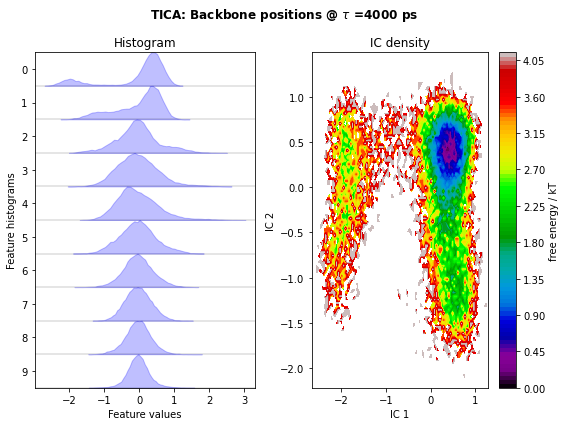

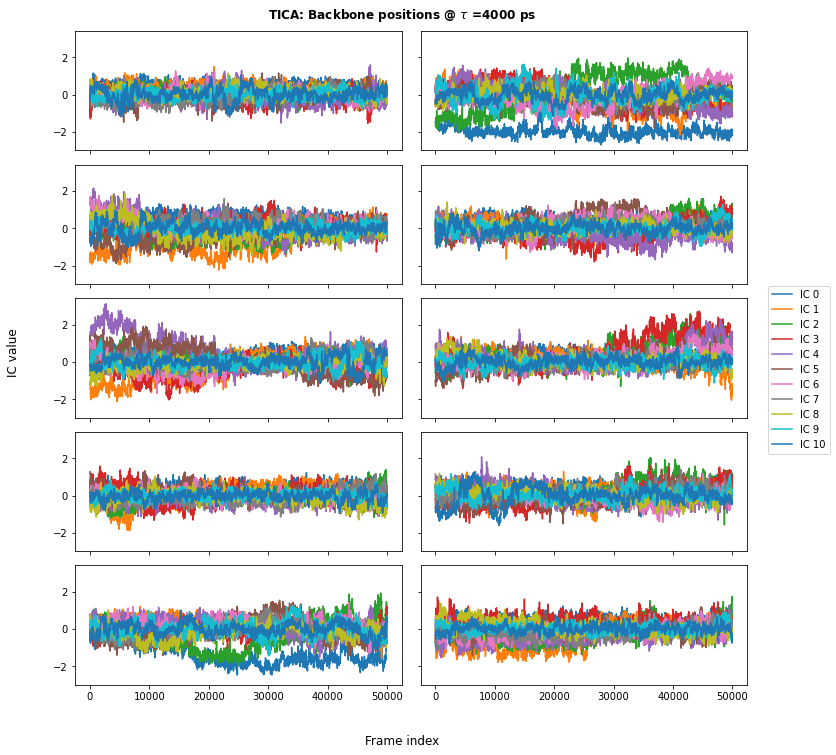

In [8]:
lags_TICA=[2, 10, 20, 50, 100, 200]
kinetic_models['TICA']=kinetics.calculate(method='TICA', 
                                          features=features_to_extract, 
                                          TICA_lags=lags_TICA, 
                                          def_traj=['production_NPT-1.dcd'])


## Clustering in TICA space

In [ ]:
lag_TICA=[1000]
kinetic_models['Clustering']=kinetics.calculate(method='Clustering',
                                                features=features_to_extract, 
                                                TICA_lags=lag_TICA, 
                                                def_traj=['production_NPT-1.dcd'])

loop_IN
	Found TICA of torsions@20000 ps
	Found TICA of positions@20000 ps
torsions@20000 ps
16-10-21 16:27:33 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[106] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4
16-10-21 16:27:54 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[109] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
	Warning! could not estimate MSM at iteration 1/4(2/5)
	Warning! could not estimate MSM at iteration 3/4(4/5)
	Warning! could not estimate MSM at iteration 4/4(5/5)
	Warning! could not estimate MSM at iteration 0/4(1/5)
	Warning! could not estimate MSM at iteration 1/4(2/5)
	Warning! could not estimate MSM at iteration 2/4(3/5)
	Warning! could not estimate MSM at iteration 3/4(4/5)
	Warning! could not estimate MSM at iteration 4/4(5/5)


positions@20000 ps
16-10-21 18:54:39 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[184] WARN

## Implied Timescales

In [ ]:
lag_TICA=[1000]
region_states = {'loop_IN' : 30, #red
                   'post_SET_domain' : 30, #blue
                   'SETcd' : 30, #green
                   'control'  : 30, #yellow
                'combined': 30} #cyan

kinetic_models['ITS']=kinetics.calculate(inputs=region_states, 
                                         method='ITS', 
                                         features=features_to_extract, 
                                         lags=lag_TICA, 
                                         def_traj=['production_NPT-1.dcd'])

loop_IN
	Found TICA of torsions@20000 ps
	Found TICA of positions@20000 ps
Generating ITS profile for torsions@20000 ps
	Clustering for 30 cluster centres
	Warning!Could not generate ITS. Increasing stride.
	Clustering for 30 cluster centres


## Model generation

In [10]:
states_lags = {'loop_IN' : (30, 750), #red
                   'post_SET_domain' : (30, 750), #blue
                   'SETcd' : (30, 750), #green
                   'control'  : (30, 750), #yellow
                'combined': (30, 750)} #cyan

kinetic_models['bayesMSM']=kinetics.calculate(inputs=states_lags,
                                         method='bayesMSM', 
                                         features=features_to_extract, 
                                         TICA_lags=[200, 1000], 
                                         def_traj=['production_NPT-1.dcd'])

loop_IN
	Found TICA of torsions@4000 ps
	Found TICA of torsions@20000 ps
	Found TICA of positions@4000 ps
	Found TICA of positions@20000 ps
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
post_SET_domain
	Found TICA of torsions@4000 ps
	Found TICA of torsions@20000 ps
	Found TICA of positions@4000 ps
	Found TICA of positions@20000 ps
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
SETcd
	Found TICA of torsions@4000 ps
	Found TICA of torsions@20000 ps
	Found TICA of positions@4000 ps
	Found TICA of positions@20000 ps
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)

## MSM validation

In [12]:
states_lags_metastates = {'loop_IN' : (30, 750, (3,6)), #red
                   'post_SET_domain' : (30, 750, (3,6)), #blue
                   'SETcd' : (30, 750, (3,6)), #green
                   'control'  : (30, 750, (3,6)), #yellow
                'combined': (30, 750, (3,6))} #cyan

## Spectral Analysis

Filtering fully connected models.
loop_IN
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
	Warning! Model positions@4000 ps (30states @ 15000 ps) is disconnected: 0.967 states, 0.981 counts
	Warning! Model positions@20000 ps (30states @ 15000 ps) is disconnected: 0.933 states, 0.981 counts
loop_IN-torsions@4000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


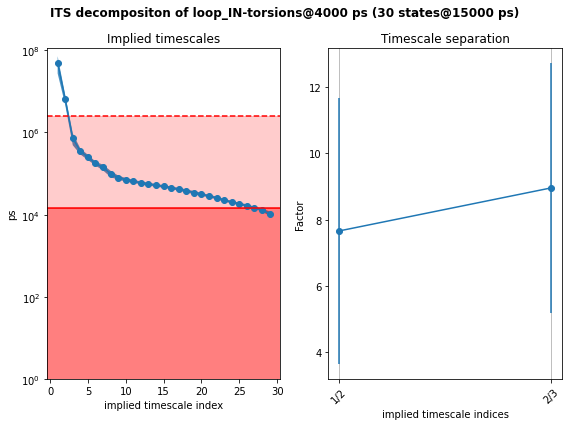

loop_IN-torsions@20000 ps
	4 processes with 95.0% ITS resolved above lag time (15000 ps)


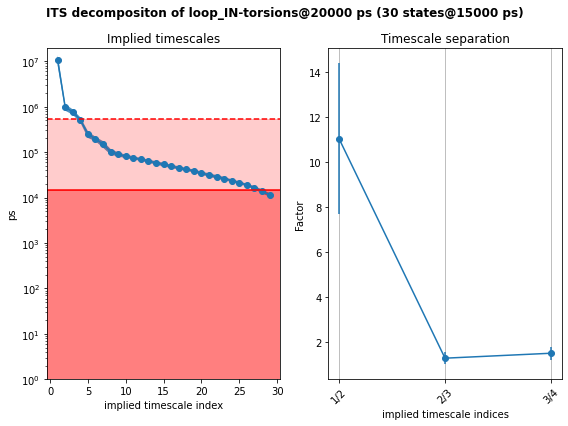

post_SET_domain
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
loop_IN-torsions@4000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


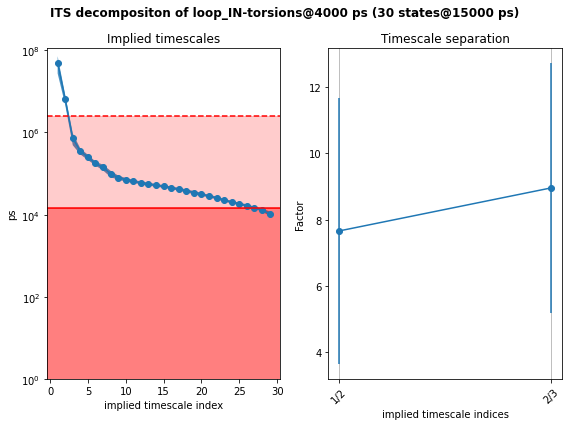

loop_IN-torsions@20000 ps
	4 processes with 95.0% ITS resolved above lag time (15000 ps)


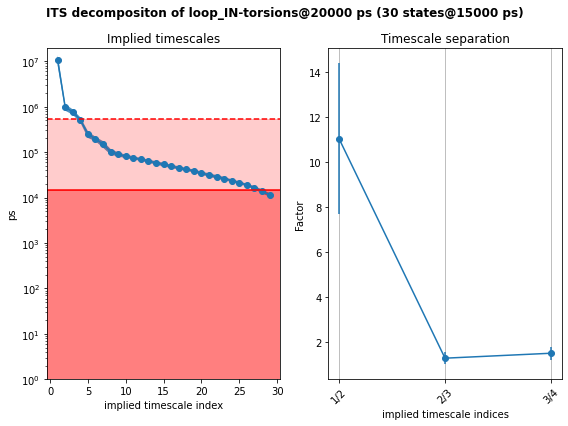

post_SET_domain-torsions@4000 ps
	12 processes with 95.0% ITS resolved above lag time (15000 ps)


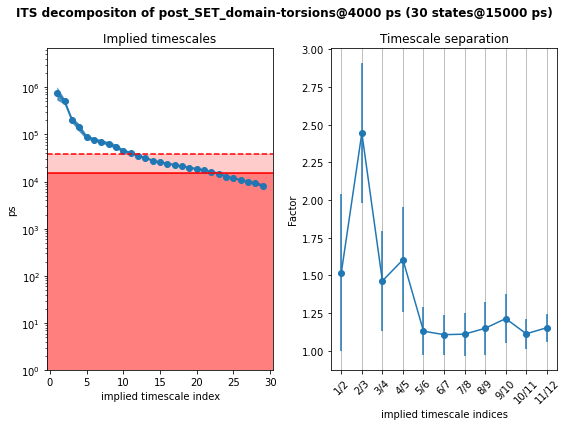

post_SET_domain-torsions@20000 ps
	13 processes with 95.0% ITS resolved above lag time (15000 ps)


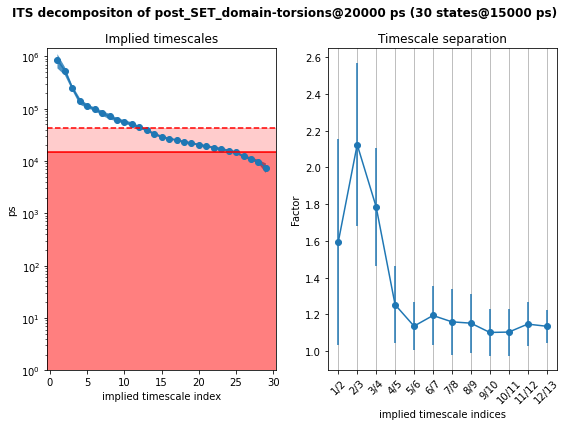

post_SET_domain-positions@4000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


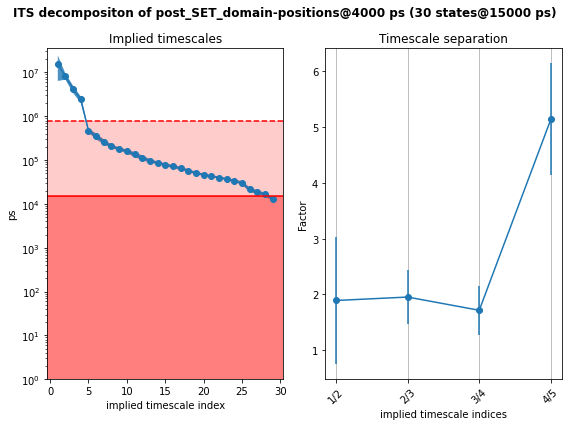

post_SET_domain-positions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


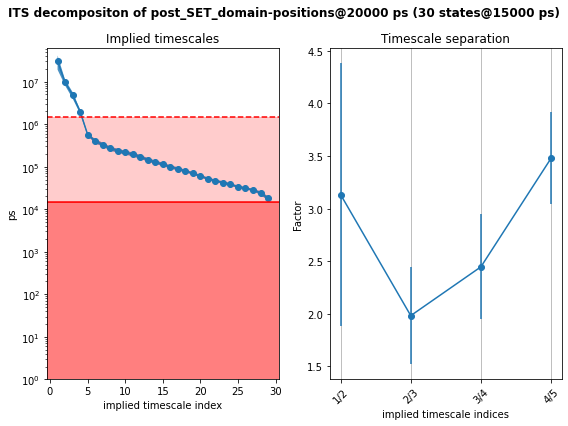

SETcd
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
	Warning! Model torsions@4000 ps (30states @ 15000 ps) is disconnected: 0.9 states, 0.957 counts
	Warning! Model positions@4000 ps (30states @ 15000 ps) is disconnected: 0.967 states, 0.979 counts
loop_IN-torsions@4000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


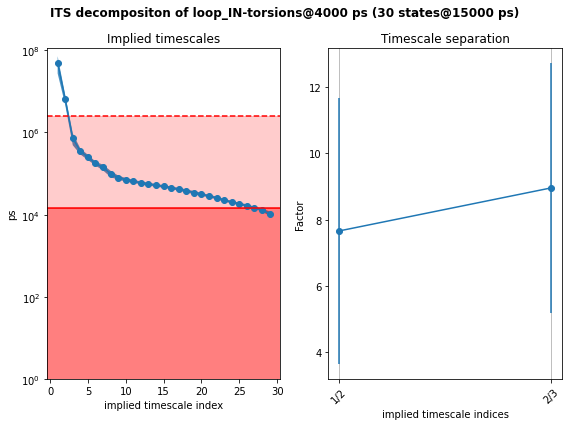

loop_IN-torsions@20000 ps
	4 processes with 95.0% ITS resolved above lag time (15000 ps)


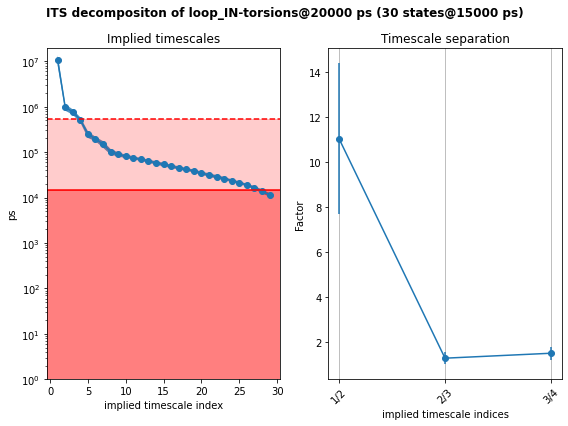

post_SET_domain-torsions@4000 ps
	12 processes with 95.0% ITS resolved above lag time (15000 ps)


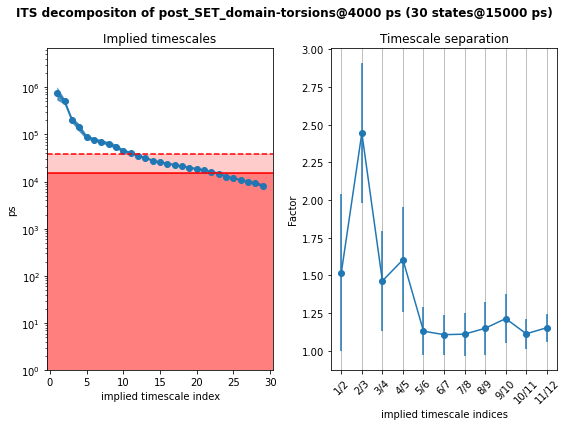

post_SET_domain-torsions@20000 ps
	13 processes with 95.0% ITS resolved above lag time (15000 ps)


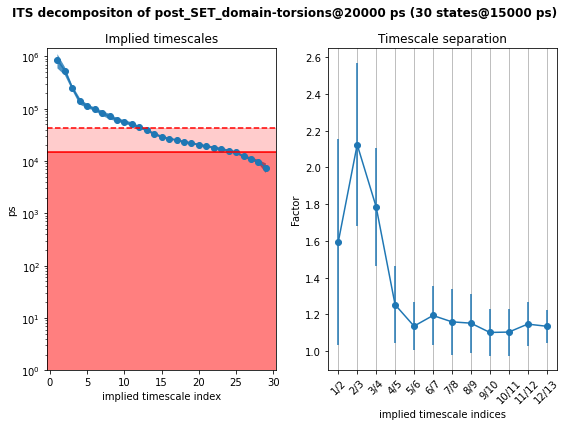

post_SET_domain-positions@4000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


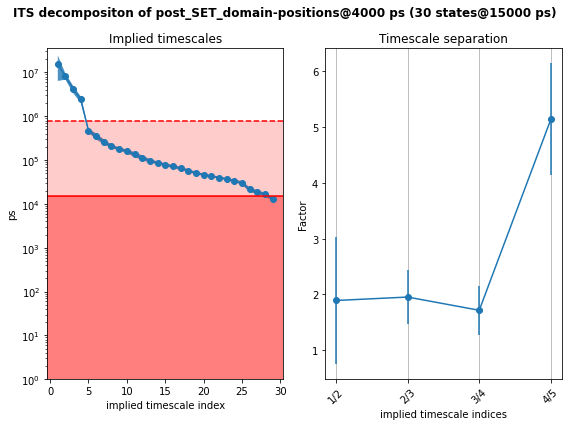

post_SET_domain-positions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


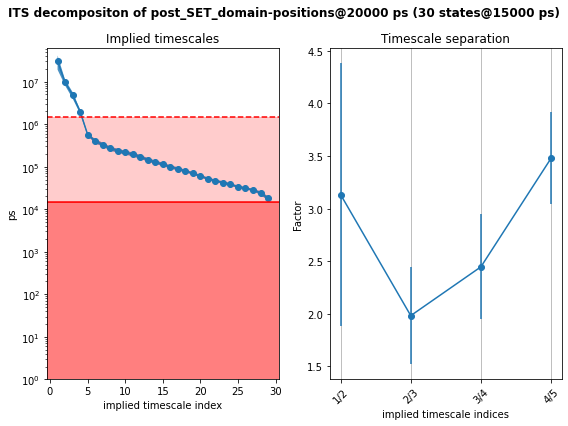

SETcd-torsions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


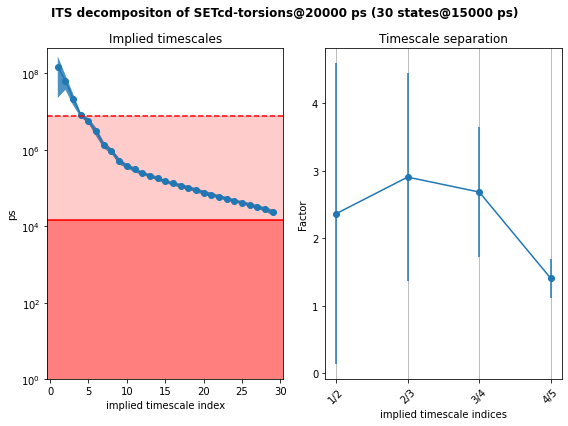

SETcd-positions@20000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


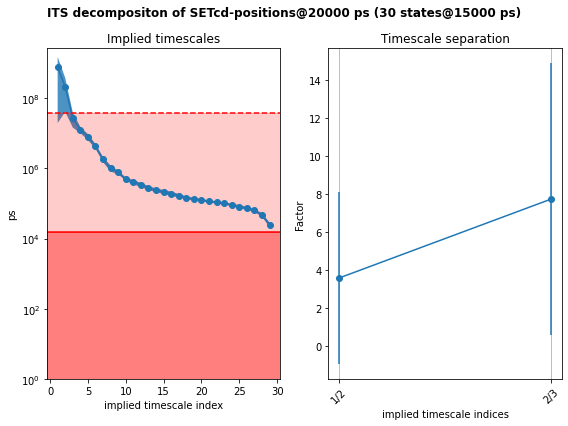

control
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
loop_IN-torsions@4000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


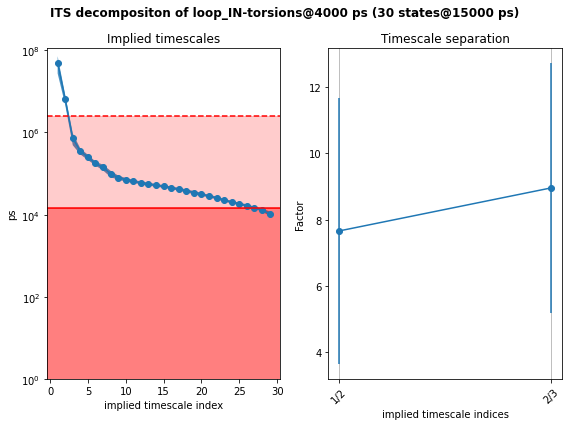

loop_IN-torsions@20000 ps
	4 processes with 95.0% ITS resolved above lag time (15000 ps)


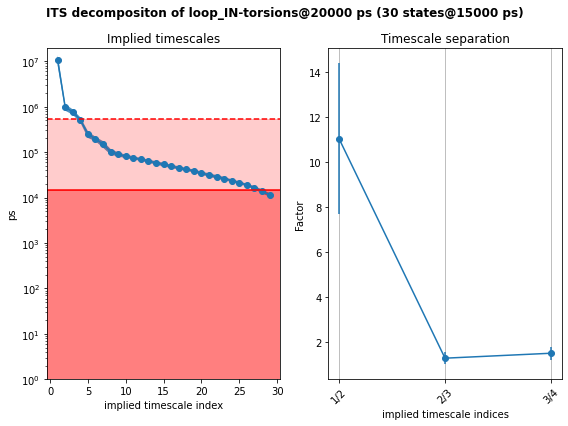

post_SET_domain-torsions@4000 ps
	12 processes with 95.0% ITS resolved above lag time (15000 ps)


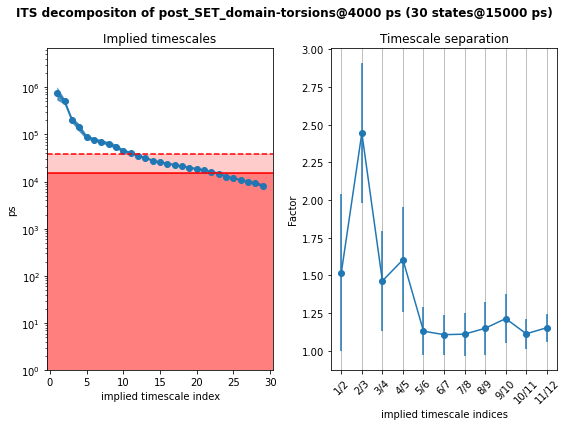

post_SET_domain-torsions@20000 ps
	13 processes with 95.0% ITS resolved above lag time (15000 ps)


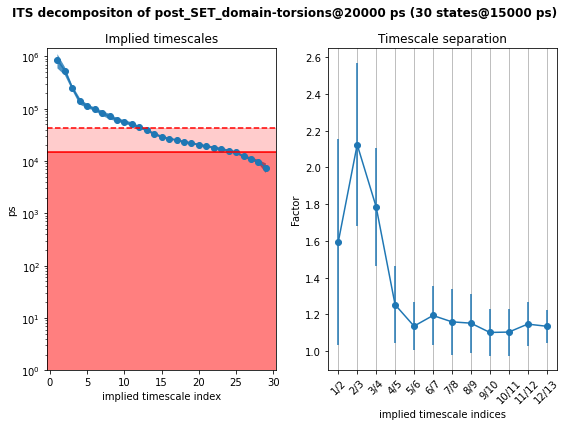

post_SET_domain-positions@4000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


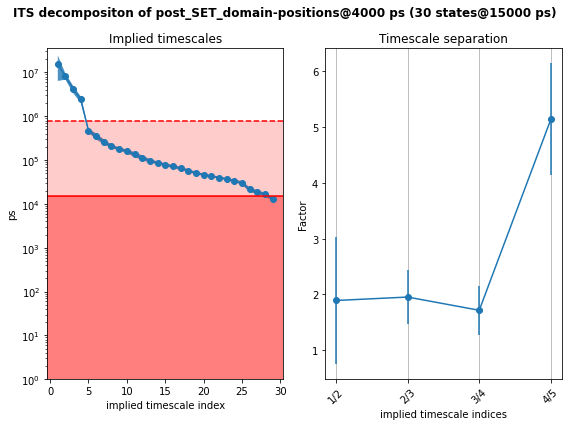

post_SET_domain-positions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


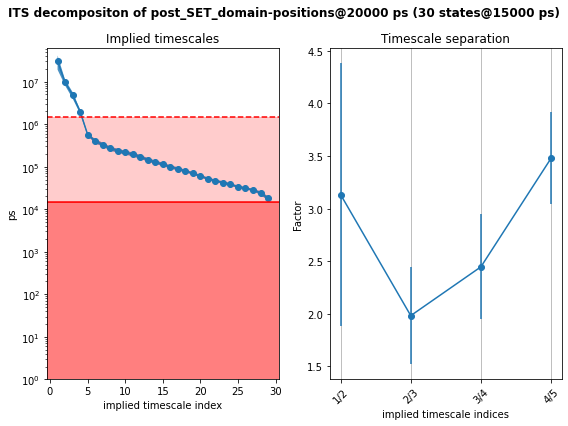

SETcd-torsions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


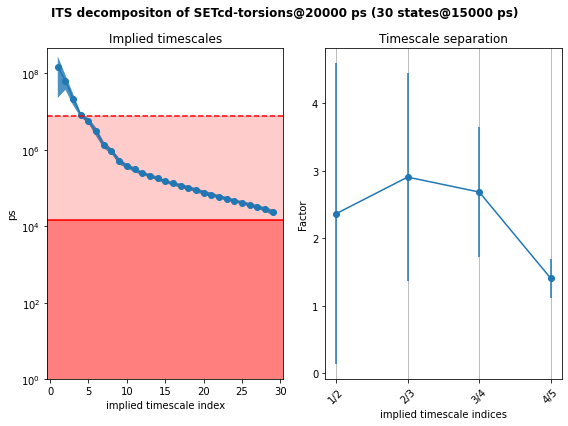

SETcd-positions@20000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


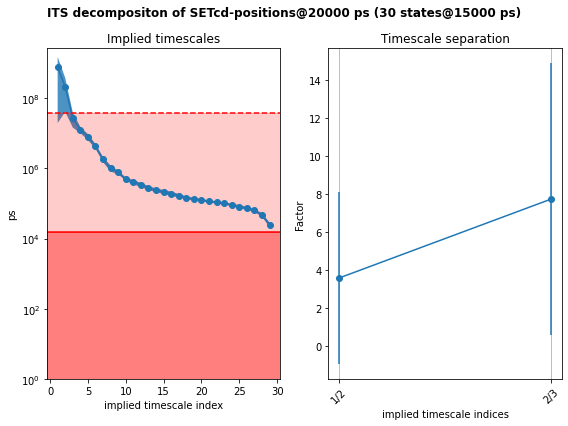

control-torsions@4000 ps
	Model discarded. Not enough processes resolved above lag time
control-torsions@20000 ps
	Model discarded. Not enough processes resolved above lag time
control-positions@4000 ps
	Model discarded. Not enough processes resolved above lag time
control-positions@20000 ps
	Model discarded. Not enough processes resolved above lag time
combined
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
	Warning! Model torsions@4000 ps (30states @ 15000 ps) is disconnected: 0.967 states, 0.987 counts
	Warning! Model torsions@20000 ps (30states @ 15000 ps) is disconnected: 0.967 states, 0.987 counts
	Warning! Model positions@4000 ps (30states @ 15000 ps) is disconnected: 0.9 states, 0.964 counts
	Warning! Model positions@20000 ps (30states @ 15000 ps) is disconnected: 0.967 st

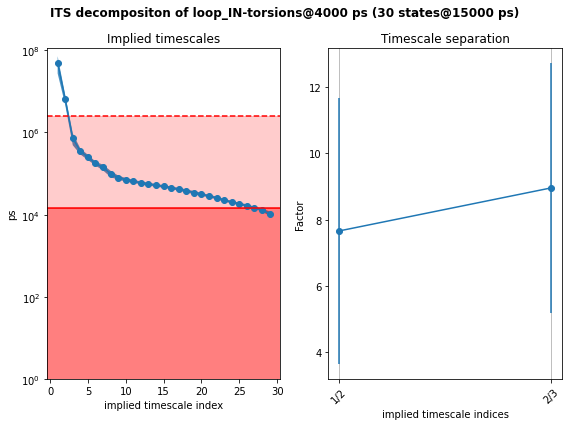

loop_IN-torsions@20000 ps
	4 processes with 95.0% ITS resolved above lag time (15000 ps)


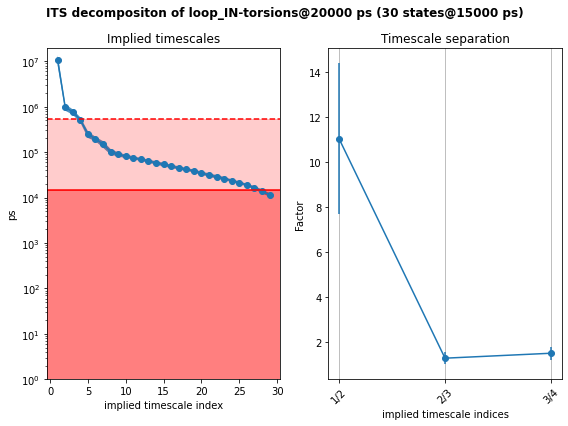

post_SET_domain-torsions@4000 ps
	12 processes with 95.0% ITS resolved above lag time (15000 ps)


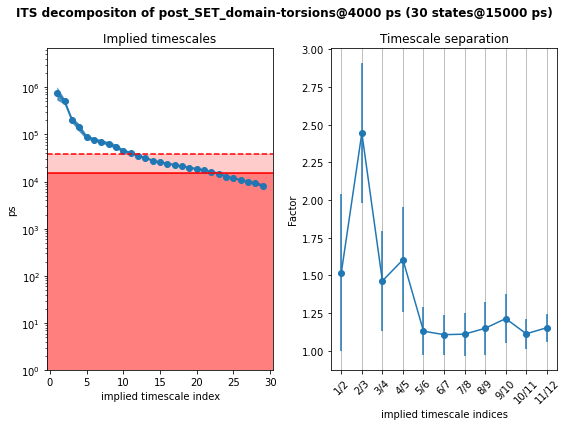

post_SET_domain-torsions@20000 ps
	13 processes with 95.0% ITS resolved above lag time (15000 ps)


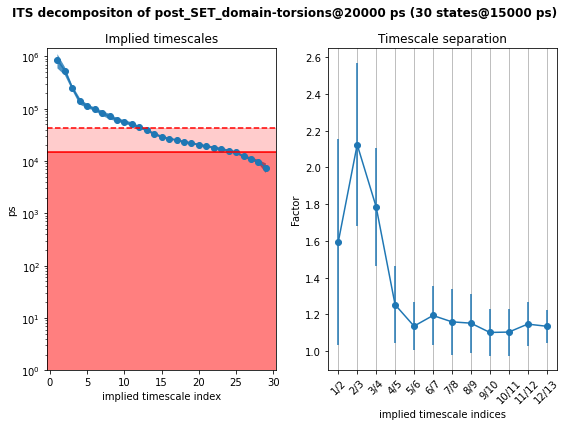

post_SET_domain-positions@4000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


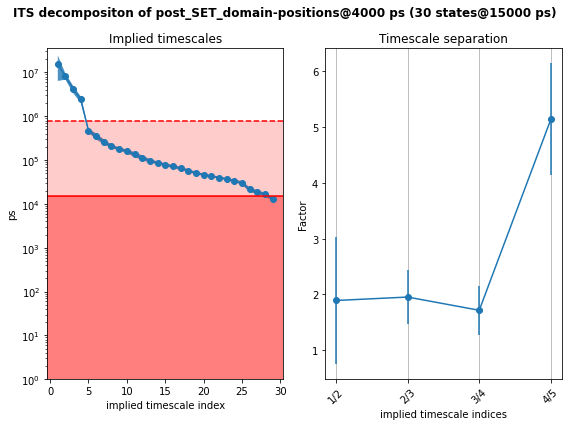

post_SET_domain-positions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


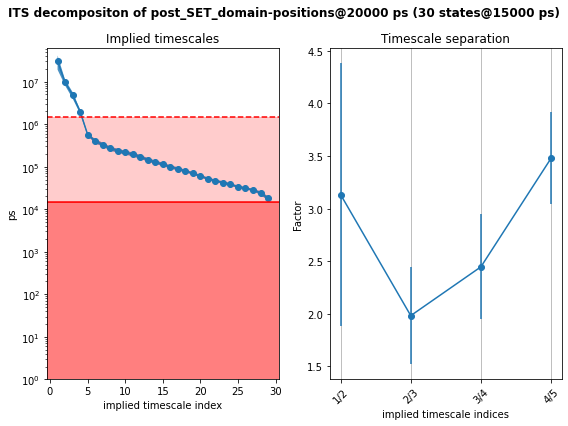

SETcd-torsions@20000 ps
	5 processes with 95.0% ITS resolved above lag time (15000 ps)


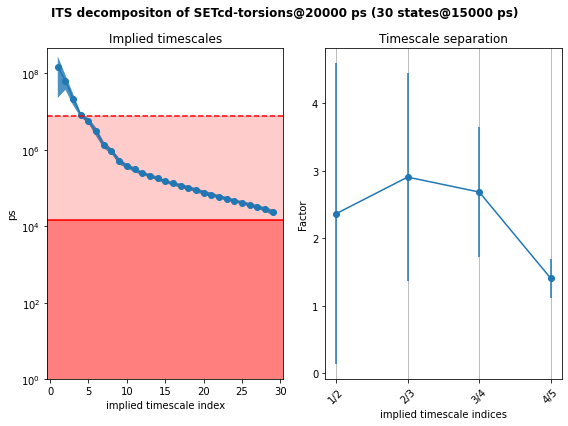

SETcd-positions@20000 ps
	3 processes with 95.0% ITS resolved above lag time (15000 ps)


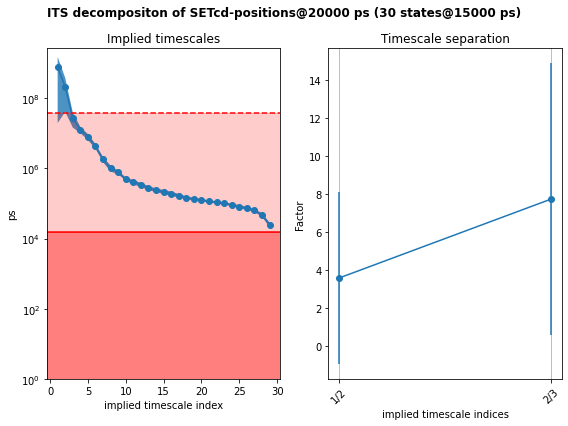

control-torsions@4000 ps
	Model discarded. Not enough processes resolved above lag time
control-torsions@20000 ps
	Model discarded. Not enough processes resolved above lag time
control-positions@4000 ps
	Model discarded. Not enough processes resolved above lag time
control-positions@20000 ps
	Model discarded. Not enough processes resolved above lag time
8/20 models filtered, 12 discarded
Selected models:
['loop_IN-torsions@4000 ps', 'loop_IN-torsions@20000 ps', 'post_SET_domain-torsions@4000 ps', 'post_SET_domain-torsions@20000 ps', 'post_SET_domain-positions@4000 ps', 'post_SET_domain-positions@20000 ps', 'SETcd-torsions@20000 ps', 'SETcd-positions@20000 ps']


In [178]:
kinetic_models['analysis']=kinetics.analysis(inputs=states_lags_metastates, method='Spectral', features=features_to_extract)

## PCCA+

Filtering fully connected models.
loop_IN
	Found Bayesian MSM of torsions@4000 ps
	Found Bayesian MSM of torsions@20000 ps
	Found Bayesian MSM of positions@4000 ps
	Found Bayesian MSM of positions@20000 ps
Warning! Model of loop_IN positions@4000 ps 30states@15000 ps is disconnected: 0.933 states, 0.981 counts
Warning! Model of loop_IN positions@20000 ps 30states@15000 ps is disconnected: 0.933 states, 0.981 counts
Viable models:  dict_keys(['torsions@4000 ps', 'torsions@20000 ps'])


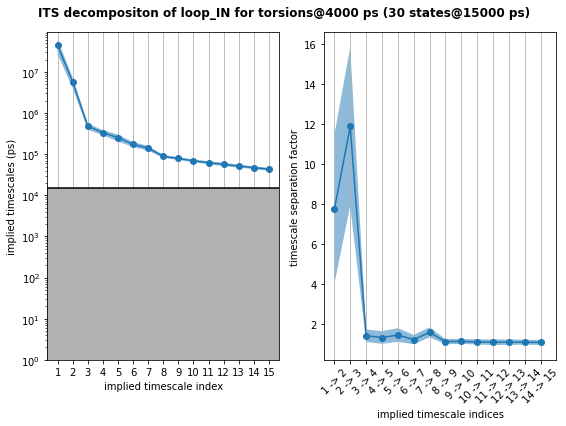

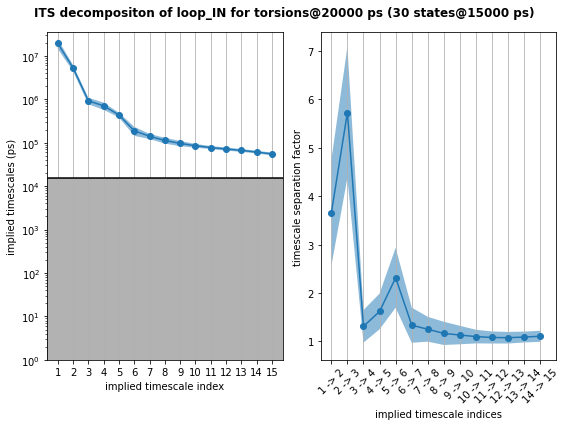

post_SET_domain
	Found Bayesian MSM of torsions@4000 ps
	Found Bayesian MSM of torsions@20000 ps
	Found Bayesian MSM of positions@4000 ps
	Found Bayesian MSM of positions@20000 ps
Viable models:  dict_keys(['torsions@4000 ps', 'torsions@20000 ps', 'positions@4000 ps', 'positions@20000 ps'])


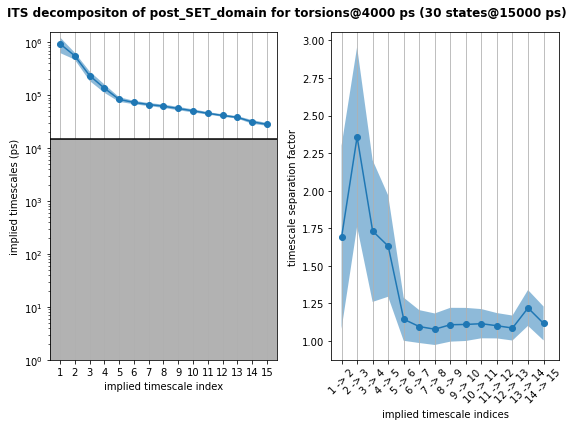

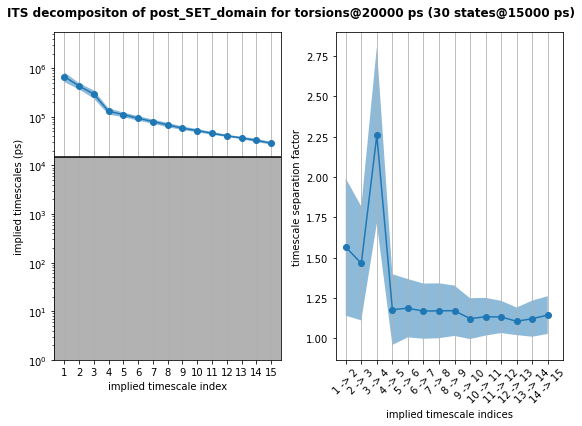

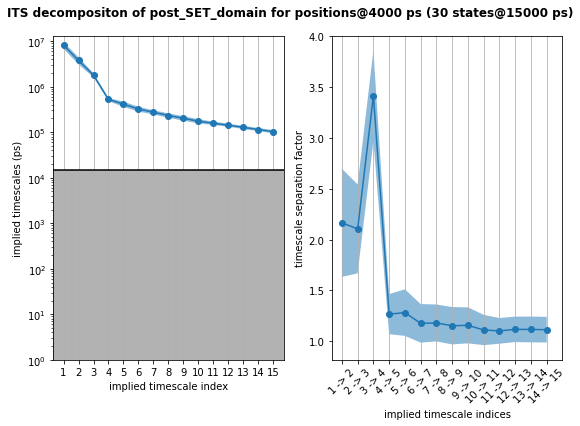

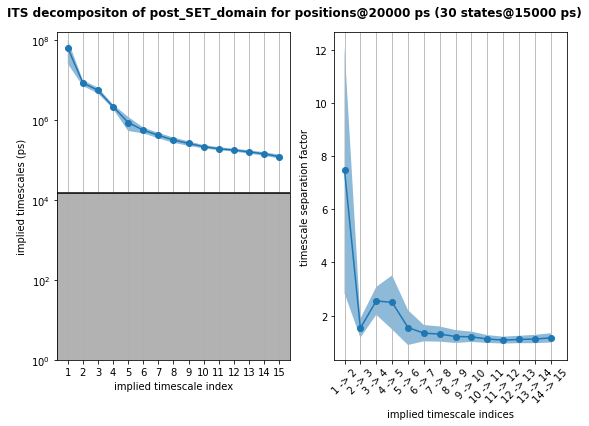

SETcd
	Found Bayesian MSM of torsions@4000 ps
	Found Bayesian MSM of torsions@20000 ps
	Found Bayesian MSM of positions@4000 ps
	Found Bayesian MSM of positions@20000 ps
Viable models:  dict_keys(['torsions@4000 ps', 'torsions@20000 ps', 'positions@4000 ps', 'positions@20000 ps'])


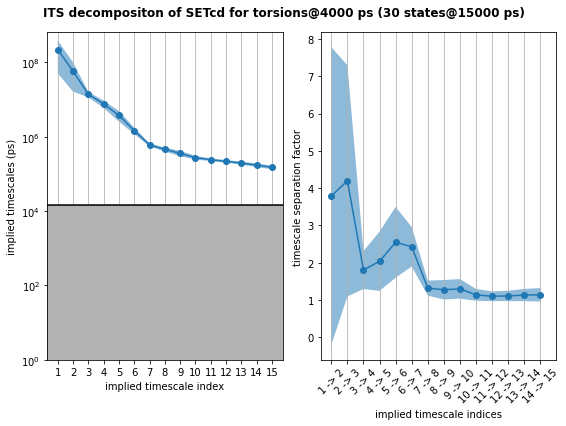

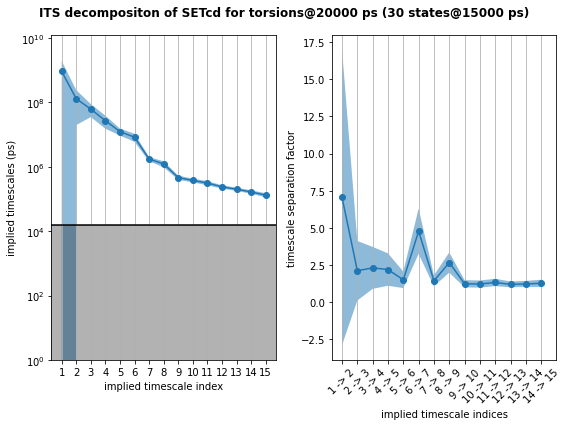

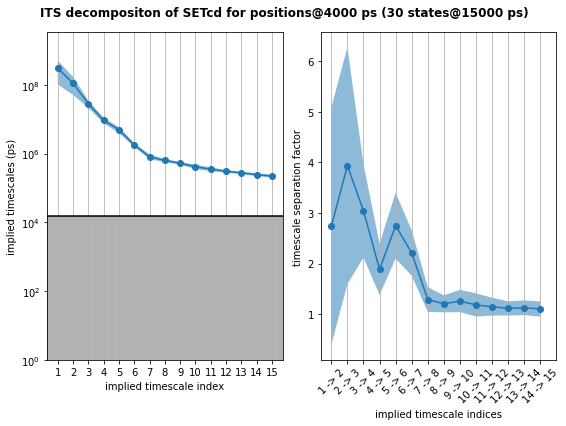

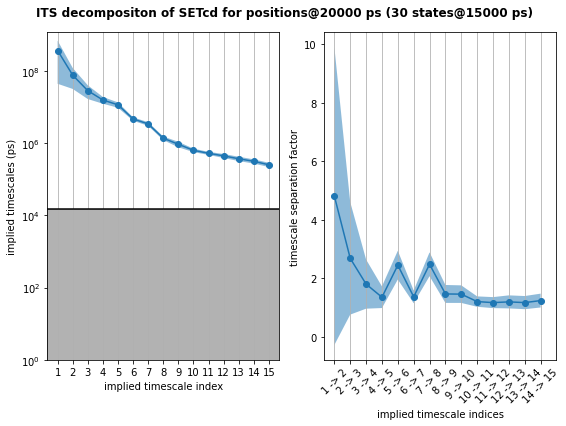

control
	Found Bayesian MSM of torsions@4000 ps
	Found Bayesian MSM of torsions@20000 ps
	Found Bayesian MSM of positions@4000 ps
	Found Bayesian MSM of positions@20000 ps
Viable models:  dict_keys(['torsions@4000 ps', 'torsions@20000 ps', 'positions@4000 ps', 'positions@20000 ps'])


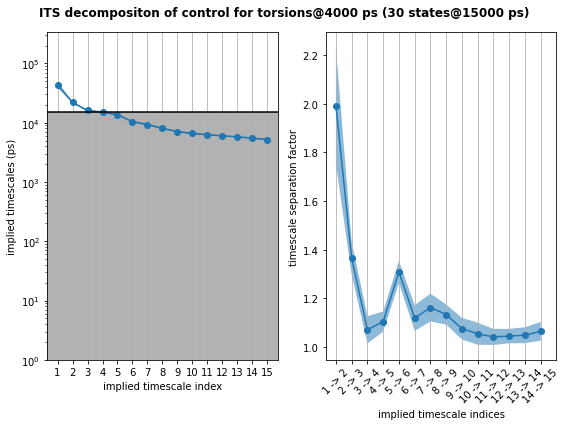

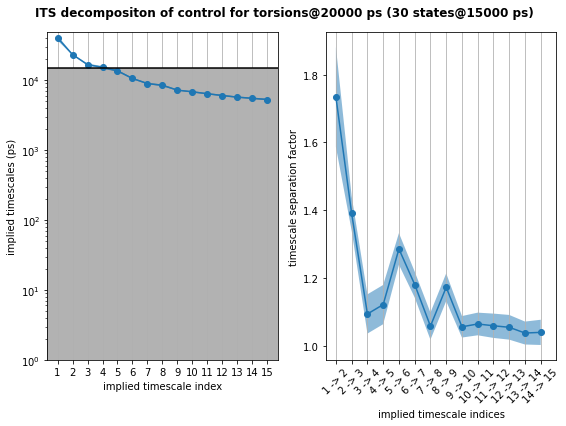

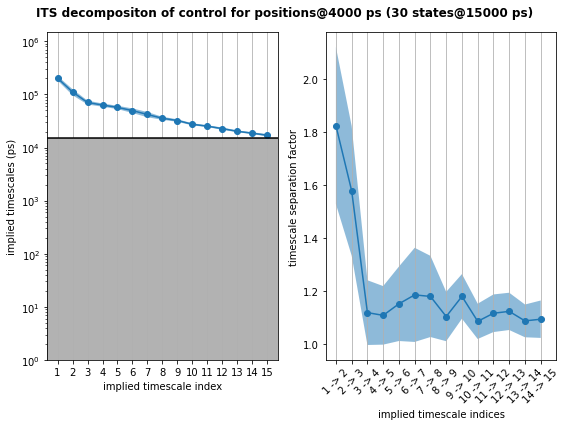

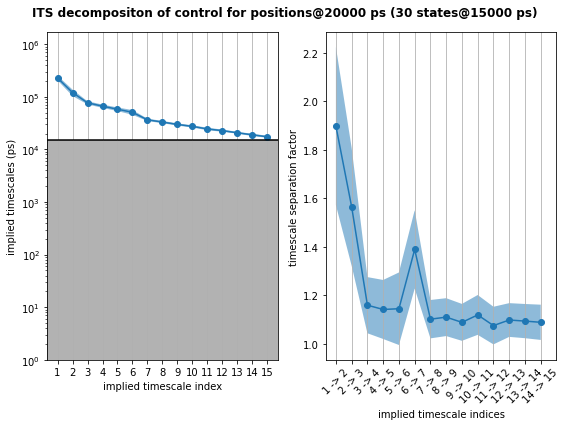

combined
	Found Bayesian MSM of torsions@4000 ps
	Found Bayesian MSM of torsions@20000 ps
	Found Bayesian MSM of positions@4000 ps
	Found Bayesian MSM of positions@20000 ps
Warning! Model of combined torsions@20000 ps 30states@15000 ps is disconnected: 0.967 states, 0.987 counts
Warning! Model of combined positions@4000 ps 30states@15000 ps is disconnected: 0.9 states, 0.968 counts
Warning! Model of combined positions@20000 ps 30states@15000 ps is disconnected: 0.867 states, 0.964 counts
Viable models:  dict_keys(['torsions@4000 ps', 'torsions@20000 ps', 'positions@4000 ps', 'positions@20000 ps'])


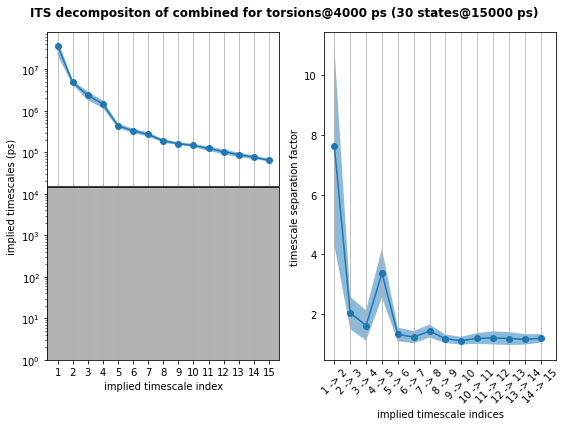

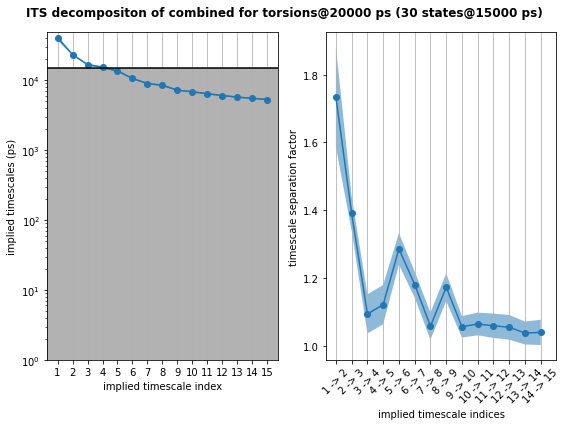

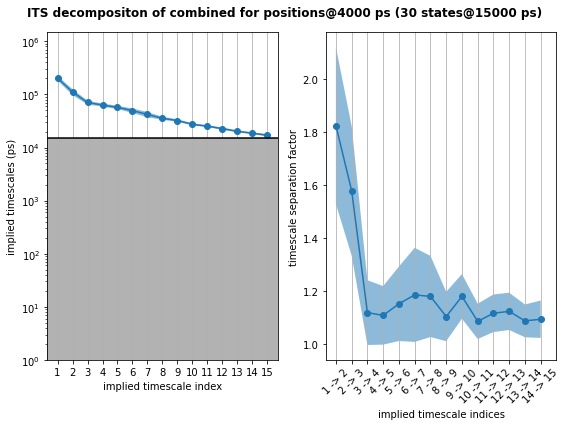

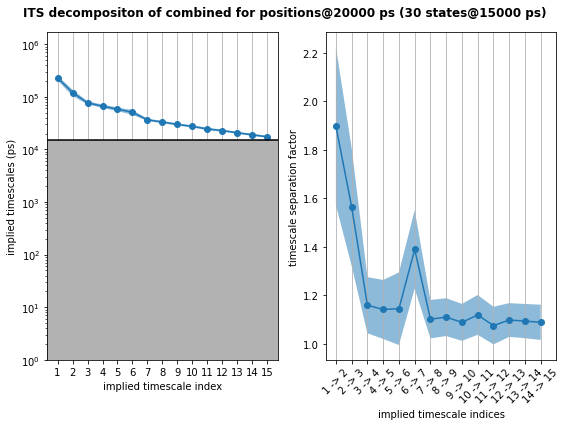

In [604]:
kinetic_models['analysis']=kinetics.analysis(inputs=states_lags_metastates, method='PCCA', features=features_to_extract)

## CK test

Filtering fully connected models.
loop_IN
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
	Warning! Model positions@4000 ps (30states @ 15000 ps) is disconnected: 0.967 states, 0.981 counts
	Warning! Model positions@20000 ps (30states @ 15000 ps) is disconnected: 0.933 states, 0.981 counts
loop_IN-torsions@4000 ps
	Performing CK test for loop_IN-torsions@4000 ps, 30 states @ 15000 ps.


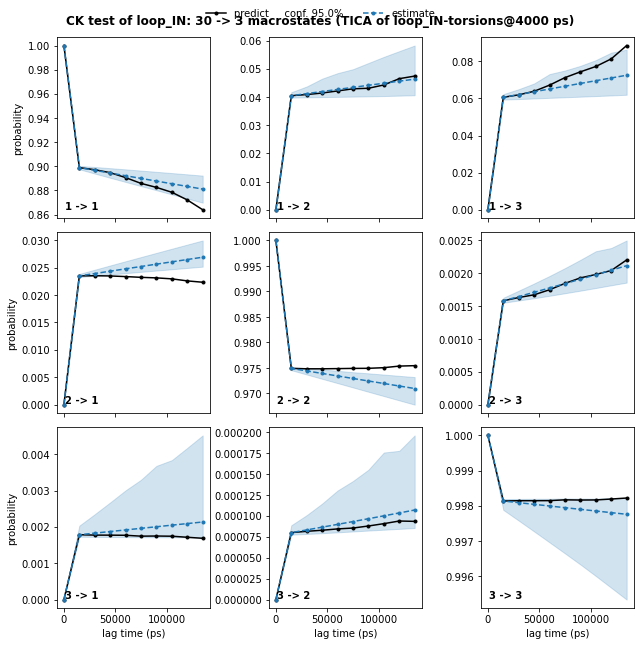

loop_IN-torsions@20000 ps
	Performing CK test for loop_IN-torsions@20000 ps, 30 states @ 15000 ps.


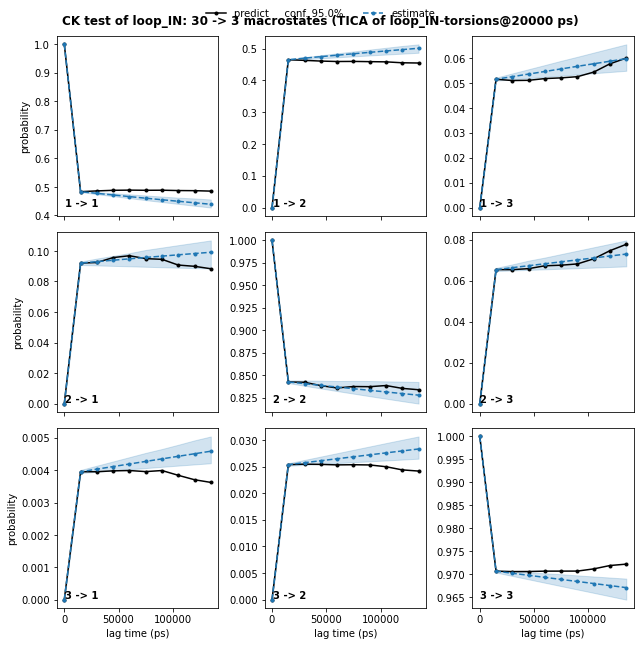

post_SET_domain
	Found Bayesian MSM of torsions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of torsions@20000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@4000 ps (30 states @ 15000 ps)
	Found Bayesian MSM of positions@20000 ps (30 states @ 15000 ps)
loop_IN-torsions@4000 ps
	Performing CK test for loop_IN-torsions@4000 ps, 30 states @ 15000 ps.


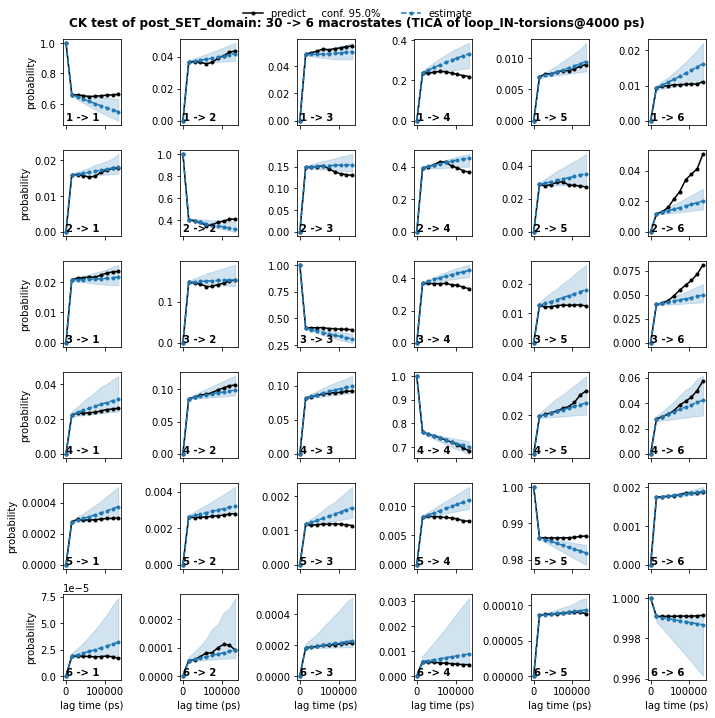

loop_IN-torsions@20000 ps
	Performing CK test for loop_IN-torsions@20000 ps, 30 states @ 15000 ps.


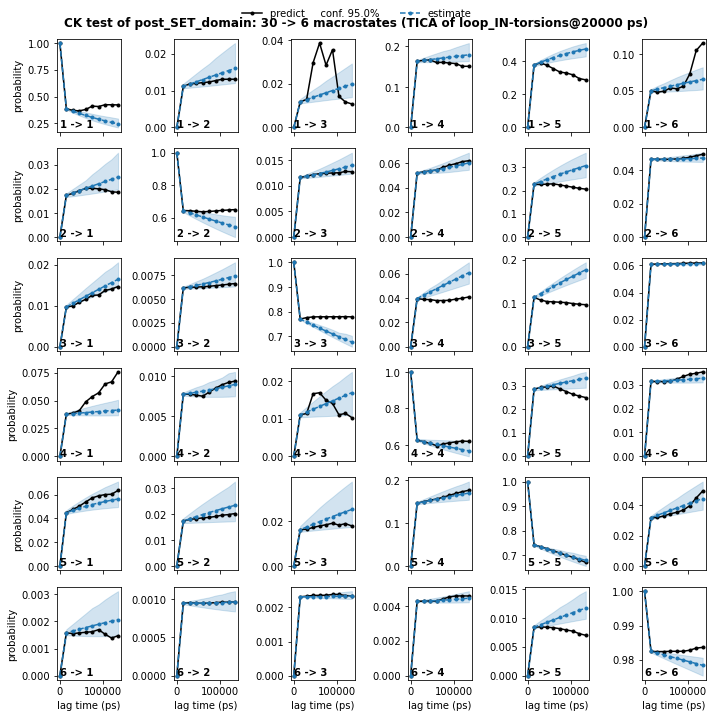

post_SET_domain-torsions@4000 ps
	Performing CK test for post_SET_domain-torsions@4000 ps, 30 states @ 15000 ps.


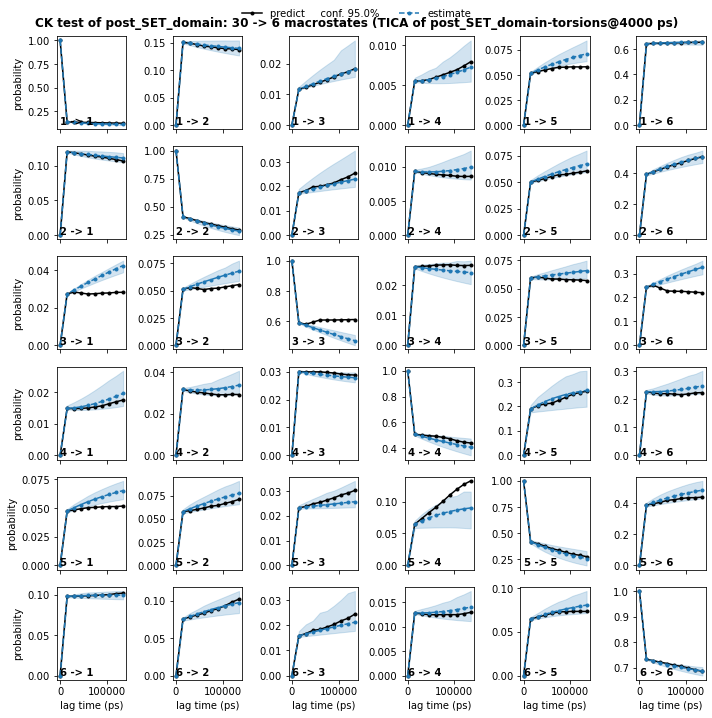

post_SET_domain-torsions@20000 ps
	Performing CK test for post_SET_domain-torsions@20000 ps, 30 states @ 15000 ps.


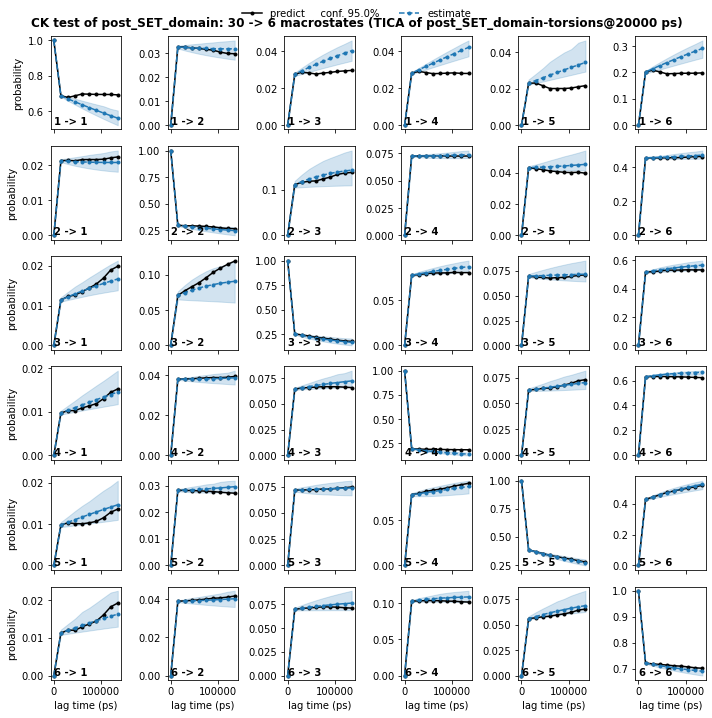

post_SET_domain-positions@4000 ps
	Performing CK test for post_SET_domain-positions@4000 ps, 30 states @ 15000 ps.


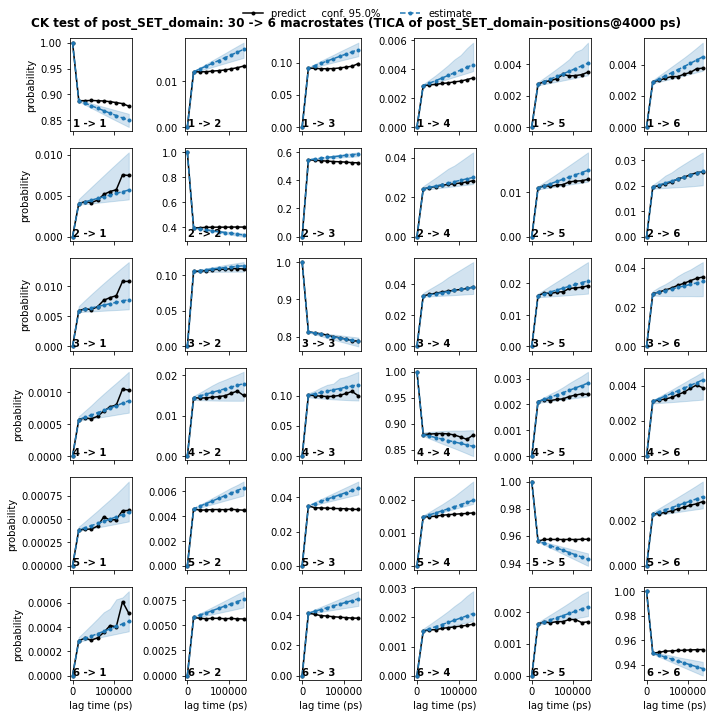

post_SET_domain-positions@20000 ps
	Performing CK test for post_SET_domain-positions@20000 ps, 30 states @ 15000 ps.


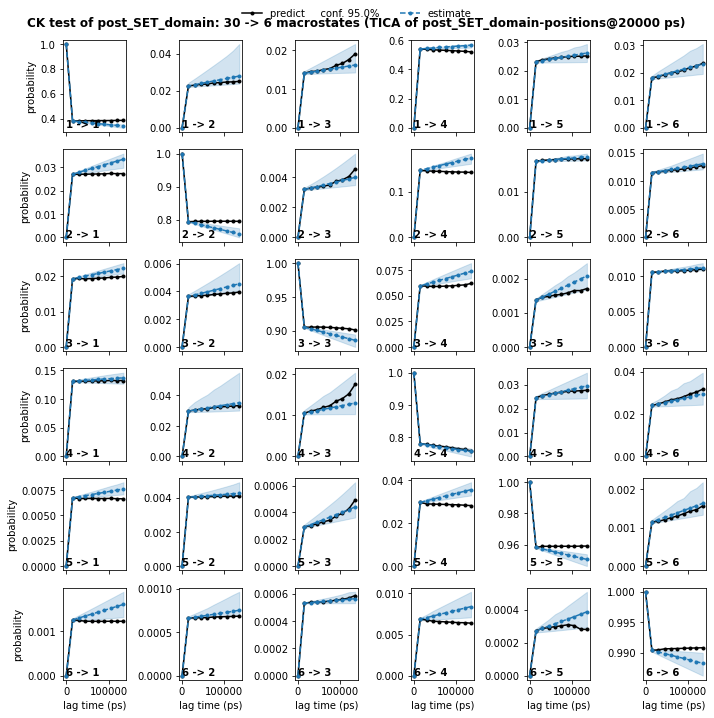

KeyError: 'SETcd'

In [191]:

states_lags_metastates = {'loop_IN' : (30, 750, 5), #red
                   'post_SET_domain' : (30, 750, 5), #blue
                   'SETcd' : (30, 750, 5), #green
                   'control'  : (30, 750, 5), #yellow
                'combined': (30, 750, 5)} #cyan
states_lags_metastates = {'loop_IN' : (30, 750, 3), #red
                   'post_SET_domain' : (30, 750, 6)} #cyan
kinetic_models['CKtest']=kinetics.analysis(inputs=states_lags_metastates,
                                         method='CKtest', 
                                         features=features_to_extract)